# Math. Foundation for E.A. - TP n°6 - Bille sur une courbe

Ce TP propose d'étudier le déplacement d'un point pesant (par exemple une bille) glissant sans frottement et sans vitesse initiale sur une courbe plane placée dans un champ de pesanteur uniforme.

On fixe un repère orthonormé tel que la pesanteur est orientée selon $\overrightarrow{g}=(0,-g)$ où $g>0$ est fixée (en pratique, on utilisera la valeur approximative $g\approx 9,81\mathrm{m}/\mathrm{s}^{2}$ de la pesanteur terrestre). On note $m$ la masse du point pesant et $M_t(x(t),y(t))$ ses coordonnées à l'instant $t$. À l'instant initial, on lâche le point pesant en $M_0(0,0)$ sur la courbe représentative $y=f(x)$ d'une fonction $f$ passant par l'origine. Ainsi :

$$x(0)=y(0)=0,\quad x'(0)=y'(0)=0\quad\text{et}\quad\forall t\geqslant 0,\ y(t)=f\big(x(t)\big).$$

On suppose de plus que $f$ est de classe $\mathscr{C}^1$ (au voisinage de $0$) et que $f'(0)<0$.

La première partie de ce TP propose de modéliser le déplacement de la bille. La deuxième partie s'intéresse au temps mis pour atteindre un point fixé sur la courbe représentative de $f$.

## Partie 1 - Modélisation

On rappelle qu'on peut utiliser la bibliothèque `matplotlib.pyplot` pour tracer des graphiques. Par exemple, les commandes suivantes permettent de tracer la courbe représentative de $f_1:x\mapsto x(x-1)$ entre $0$ et $1$.


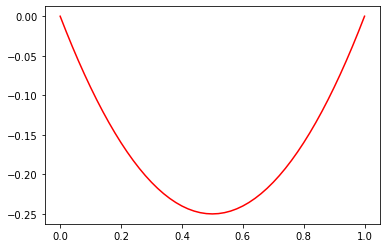

In [10]:
import matplotlib.pyplot as plt

NbPoints=50
xliste=[]
yliste=[]
for k in range(NbPoints+1):
    x=0+(1-0)*k/NbPoints
    xliste=xliste+[x]
    yliste=yliste+[x*(x-1)]

plt.plot(xliste,yliste,color="r")


La fonction `FuncAnimation` de la bibliothèque `matplotlib.animation` permet d'afficher successivement plusieurs graphiques afin de créer des animations. Par exemple :

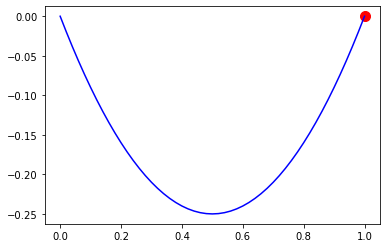

In [11]:
import matplotlib.animation as animation

fig=plt.figure()

def Bille(k): # un seul graphique
    fig.clf() # pour effacer le graphique précédent
    plt.plot(xliste,yliste,c="b") # pour tracer la courbe représentative
    x=xliste[k]
    y=yliste[k]
    plt.scatter(x,y,c="r",s=100) # pour tracer un point

# la commande suivante permet d'afficher successivement les graphiques Bille(k) pour k allant de 0 à len(xliste)-1
ani=animation.FuncAnimation(fig=fig,func=Bille,frames=len(xliste),interval=50)
# interval est égal au temps écoulé (en millisecondes) entre l'affichage de deux graphiques

# les commandes suivantes servent à afficher l'animation dans Jupyter
from IPython.display import HTML
HTML(ani.to_jshtml())


Cette animation ne modélise pas la réalité car la bille ne se déplace pas naturellement (par exemple, son mouvement accélère dans la pente croissante). En effet, puisque `xliste` suit une progression arithmétique, l'animation représente un mouvement dont la vitesse horizontale $t\mapsto x'(t)$ est constante ce qui n'est pas le cas réellement.

Pour corriger ce problème, on a besoin des lois de la physique. On rappelle que le principe de conservation de l'énergie s'écrit à l'instant $t\geqslant 0$ :

$$0=\Delta E_{\text{mécanique}}=\Delta E_{\text{cinétique}}+\Delta E_{\text{potentielle}}=\left[\tfrac{1}{2}m v^2\right]_{0}^{t}+\big[mgy\big]_{0}^{t}$$

où $v(t)=\left\|\overrightarrow{v(t)}\right\|=\sqrt{x'(t)^2+y'(t)^2}$ désigne la vitesse à l'instant $t$. On en déduit l'équation différentielle du mouvement :

$$\forall t\geqslant 0,\quad x'(t)=\sqrt{\frac{-2gf\big(x(t)\big)}{1+f'\big(x(t)\big)^2}}=F\big(x(t)\big).$$

1. Écrire des fonctions `f1`, `derivf1` et `F1` qui prennent en argument un réel $x$, puis qui renvoient les valeurs de $f_1(x)=x(x-1)$, $f_1'(x)$ et $F_1(x)=\sqrt{\frac{-2gf_1(x)}{1+f_1'(x)^2}}$ respectivement.

In [12]:
import numpy
def f1(x):
    x = x*(x-1)
    return x

def df1(x):
    x = 2*x-1
    return x

g = 9.81
def F1(x):
    x = numpy.sqrt(((-2*g*f1(x))/(1+df1(x)**2)))
    return x

2. Soit $t\mapsto x(t)$ la solution (non constante) de $x'=F_1(x)$. Écrire une fonction `Euler1` qui prend en arguments un réel $t>0$ et un entier `NbSub`$=n\in\mathbb{N}^{\ast}$, puis qui renvoie l'approximation $u_{n}$ de $x(t)$ obtenue à l'aide de la méthode d'Euler.

In [13]:
def Euler1(t,NbSub):
    u = 10e-5
    for k in range(NbSub):
        u = u+F1(u)*t/NbSub
        u = min(u,1)
    return u

3. Créer une animation modélisant le déplacement de la bille sur la courbe représentative de $f_1:x\mapsto x(x-1)$.

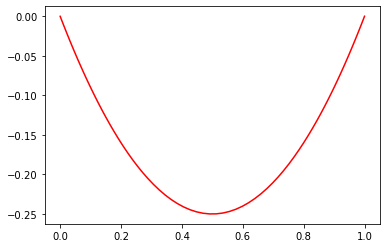

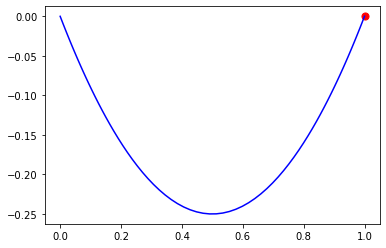

In [14]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

NbPoints=100
t=1
xliste=[]
yliste=[]
for k in range(NbPoints+1):
    x=0+(1-0)*k/NbPoints
    x = Euler1(x,100)
    xliste=xliste+[x]
    yliste=yliste+[x*(x-1)]

plt.plot(xliste,yliste,color="r")
fig=plt.figure()

def Bille(k):
    fig.clf()
    plt.plot(xliste,yliste,c="b")
    x=xliste[k]
    y=yliste[k]
    plt.scatter(x,y,c="r",s=50)

ani=animation.FuncAnimation(fig=fig,func=Bille,frames=len(xliste),interval=50)

from IPython.display import HTML
HTML(ani.to_jshtml())

4. Modéliser le mouvement de la bille parcourant un demi-cercle de $(0,0)$ à $(1,0)$.

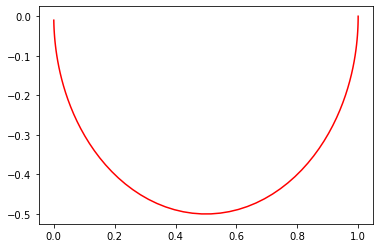

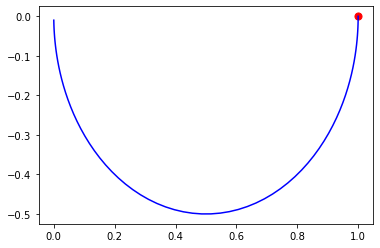

In [15]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy
from IPython.display import HTML

g = 9.81
NbPoints=100
t=1
xliste=[]
yliste=[]

def f2(x):
    x = -(numpy.sqrt(0.25-(x-0.5)**2))
    return x

def df2(x):
    m = max(10e-5,numpy.sqrt(0.25-(x-0.5)**2))
    x = (x-0.5)/m
    return x

def F2(x):
    x = numpy.sqrt(((-2*g*f2(x))/(1+df2(x)**2)))
    return x

def Euler2(t,NbSub):
    u = 10e-5
    for k in range(NbSub):
        u = u+F2(u)*t/NbSub
        u = min(u,1)
    return u

for k in range(NbPoints+1):
    x=0+(1-0)*k/NbPoints
    x = Euler2(x,100)
    xliste=xliste+[x]
    yliste=yliste+[f2(x)]

def Bille(k):
    fig.clf()
    plt.plot(xliste,yliste,c="b")
    x=xliste[k]
    y=yliste[k]
    plt.scatter(x,y,c="r",s=50)

plt.plot(xliste,yliste,color="r")
fig=plt.figure()
ani=animation.FuncAnimation(fig=fig,func=Bille,frames=len(xliste),interval=50)

HTML(ani.to_jshtml())

## Partie 2 - Temps de parcours

Pour déterminer le temps $T_A$ mis par la bille pour atteindre un point $A(x_A,f(x_A))$ sur la courbe représentative de $f$, il suffit de résoudre l'équation $x(T_A)=x_A$. Malheureusement, on sait seulement calculer des approximations de la solution $t\mapsto x(t)$ de $x'=F(x)$ à l'aide de la méthode d'Euler, ce qui rend difficile le calcul de $T_A$ par cette méthode.

Cependant, en écrivant l'équation différentielle du mouvement sous la forme :

$$\forall t>0,\quad 1=\frac{x'(t)}{F\big(x(t)\big)}=x'(t)\times\sqrt{\frac{1+f'\big(x(t)\big)^2}{-2gf\big(x(t)\big)}}=x'(t)\times G'\big(x(t)\big).$$

on remarque qu'on reconnaît la formule de dérivation d'une composition. En intégrant entre $t=0$ et $t=T_A$, on en déduit que :

\begin{align*}
    T_A &= \big[t\big]_{t=0}^{T_A}=\int_0^{T_A}1\mathrm{d}t=\int_0^{T_A}x'(t)\times G'\big(x(t)\big)\mathrm{d}t=\left[G\big(x(t)\big)\right]_{t=0}^{T_A}=G(x_A)-G(0) \\
    &= \left[G\big(x\big)\right]_{x=0}^{x_A}=\int_0^{x_A}G'(x)\mathrm{d}x=\int_0^{x_A}\sqrt{\frac{1+f'(x)^2}{-2gf(x)}}\mathrm{d}x=\int_0^{x_A}\frac{\mathrm{d}x}{F(x)}.
\end{align*}

5. Soit $t\mapsto x(t)$ la solution (non constante) de $x'=F_1(x)$. Écrire une fonction `Riemann1` qui prend en arguments un entier `NbSub`$=n\in\mathbb{N}^{\ast}$, puis qui renvoie l'approximation de $T_{(1,0)}$ obtenue à l'aide d'une somme de Riemann .



In [ ]:
def Riemann1(NbSub):
    S = 0

6. Calculer une approximation du temps mis par la bille pour parcourir un demi-cercle de $(0,0)$ à $(0,1)$.